# Customer Churn Prediction

# PROBLEM STATEMENT - 1

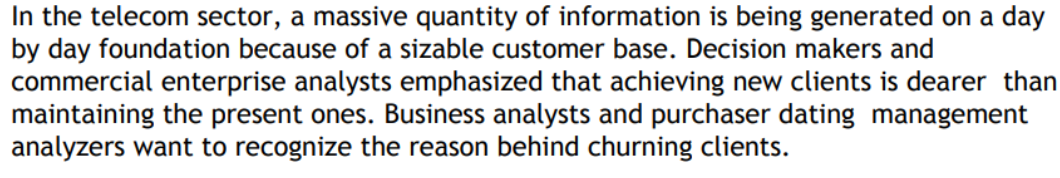

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
for col in df.columns:
    print(df[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data cleaning

Data cleaning is the process of identifying and fixing incorrect data. 

It can be in incorrect format, duplicates, corrupt, inaccurate, incomplete, or irrelevant.

Various fixes can be made to the data values representing incorrectness in the data.

In [8]:
# total charges column data type is object , so convert it into numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# drop customerID column , it won't help in feature selection
df.drop(['customerID'],inplace=True,axis=1)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# checking null (nan) values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
#removing null(nan) values
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
#checking duplicates
df.duplicated().sum()

22

In [20]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
#Outliers analysis

In [25]:
num_cols = [col for col in df.columns if df[col].dtype !='object' and col!='Churn']

In [26]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
import matplotlib.pyplot as plt

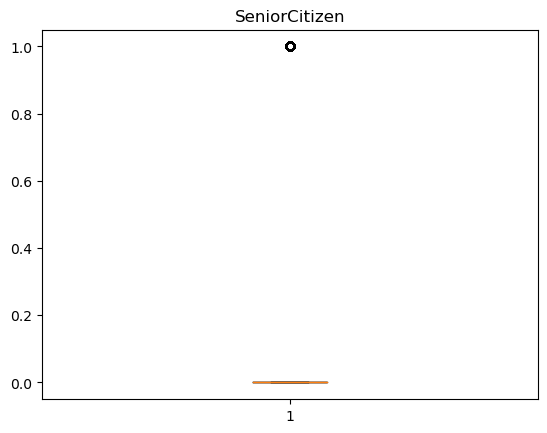

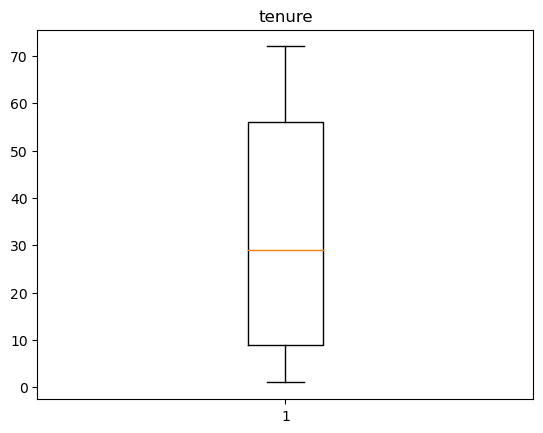

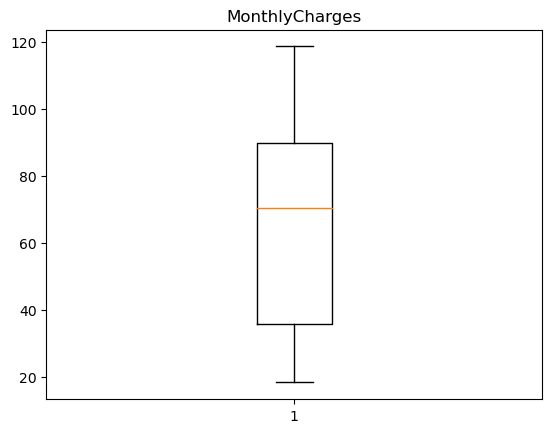

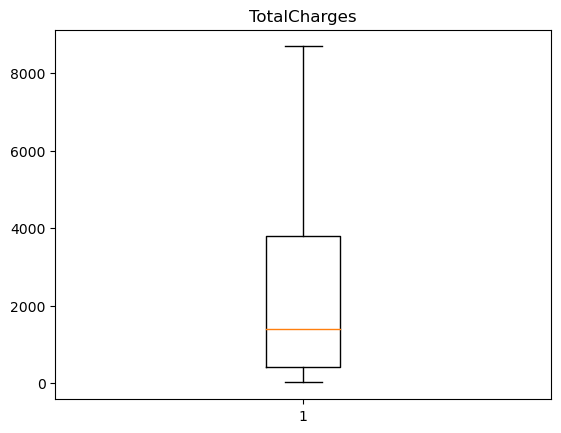

In [28]:
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [29]:
# there are no outliers present
# SeniorCitizen is an exceptional column
# exceptional columns are columns -> when we plot boxplot , we won't get box clearly 

### Data Preprocessing 

In [30]:
# LabelEncoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Feature Selection

In [35]:
#correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001069,-0.000583,0.010912,0.006370,-0.007799,-0.006107,-0.003143,-0.015145,-0.012045,0.001250,-0.006916,-0.005662,-0.008958,0.000780,-0.011497,0.015889,-0.012361,0.000879,-0.008694
SeniorCitizen,-0.001069,1.000000,0.016030,-0.211479,0.014456,0.008724,0.145621,-0.031066,-0.127982,-0.013398,-0.021174,-0.151088,0.030946,0.047029,-0.142890,0.155922,-0.036921,0.219131,0.101642,0.151270
Partner,-0.000583,0.016030,1.000000,0.451254,0.379564,0.019420,0.140133,0.003292,0.150372,0.152434,0.165035,0.126178,0.135781,0.128968,0.292330,-0.014856,-0.153504,0.095277,0.317021,-0.148670
Dependents,0.010912,-0.211479,0.451254,1.000000,0.161288,-0.000408,-0.027064,0.046046,0.151016,0.089719,0.079203,0.132310,0.045470,0.021293,0.239279,-0.110973,-0.039886,-0.114641,0.062762,-0.162366
tenure,0.006370,0.014456,0.379564,0.161288,1.000000,0.009217,0.341092,-0.026302,0.327588,0.372391,0.372635,0.324995,0.289941,0.296141,0.675876,0.003709,-0.367462,0.244194,0.825293,-0.353339
PhoneService,-0.007799,0.008724,0.019420,-0.000408,0.009217,1.000000,-0.019519,0.387380,-0.013990,0.024374,0.005034,-0.017958,0.056847,0.043477,0.003872,0.017017,-0.006624,0.249625,0.114222,0.011072
MultipleLines,-0.006107,0.145621,0.140133,-0.027064,0.341092,-0.019519,1.000000,-0.106444,0.006767,0.116575,0.121931,0.010384,0.174570,0.180860,0.108741,0.164971,-0.173869,0.432571,0.451510,0.040181
InternetService,-0.003143,-0.031066,0.003292,0.046046,-0.026302,0.387380,-0.106444,1.000000,-0.029011,0.036332,0.045177,-0.026600,0.108283,0.098053,0.102317,-0.136588,0.081012,-0.319423,-0.173540,-0.047169
OnlineSecurity,-0.015145,-0.127982,0.150372,0.151016,0.327588,-0.013990,0.006767,-0.029011,1.000000,0.184027,0.174864,0.284102,0.043283,0.055206,0.374122,-0.157104,-0.096837,-0.053041,0.254466,-0.288246
OnlineBackup,-0.012045,-0.013398,0.152434,0.089719,0.372391,0.024374,0.116575,0.036332,0.184027,1.000000,0.186649,0.194673,0.145971,0.135948,0.280295,-0.011890,-0.125415,0.120560,0.375430,-0.193979


<AxesSubplot:>

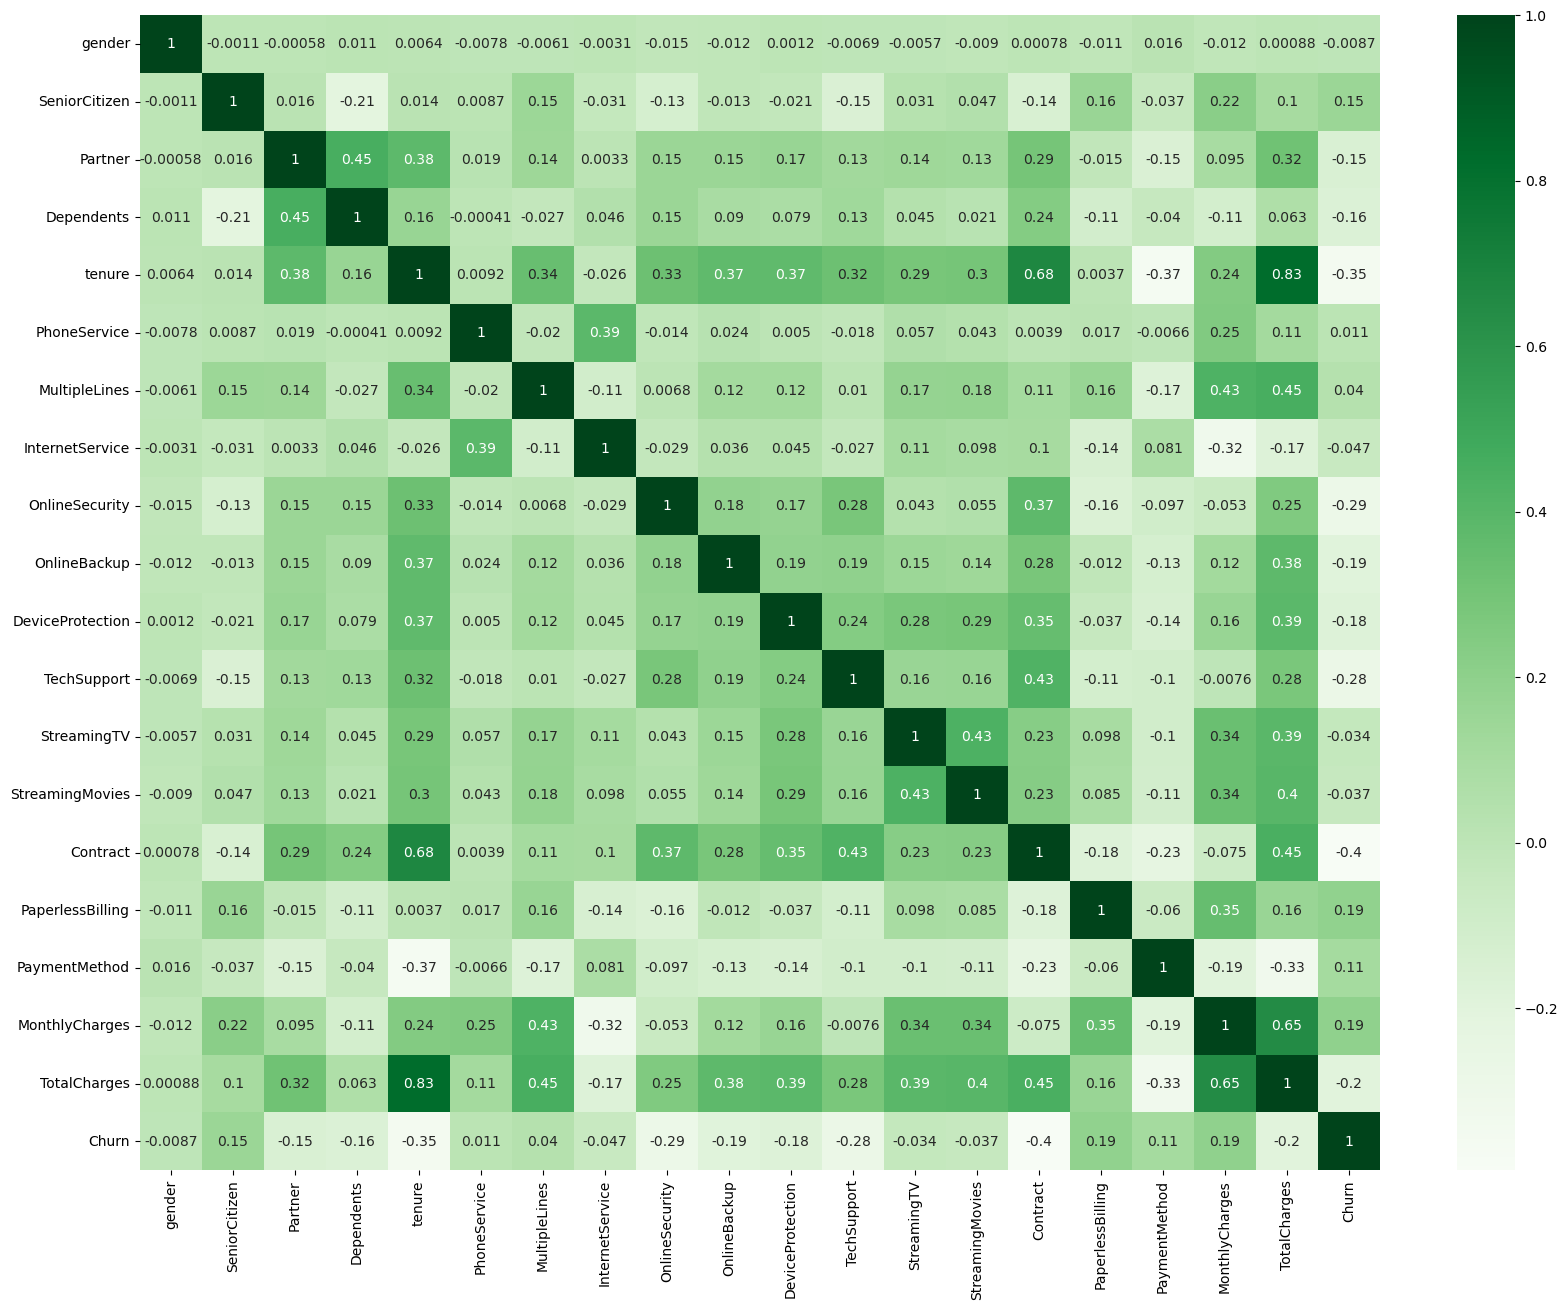

In [41]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [44]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [47]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col!="Churn"]
print(num_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [49]:
x = df[num_cols]
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [50]:
VIF = pd.DataFrame()
VIF['Featues'] = x.columns
VIF['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
VIF

,Featues,VIF
0,gender,1.953603
1,SeniorCitizen,1.370268
2,Partner,2.819802
3,Dependents,1.958374
4,tenure,15.122819
5,PhoneService,15.122810
6,MultipleLines,2.759394
7,InternetService,4.331277
8,OnlineSecurity,2.246424
9,OnlineBackup,2.454366


In [51]:
x.drop(['MonthlyCharges'],inplace=True,axis=1)

C:\Users\sivak\AppData\Local\Temp\ipykernel_22328\2111707588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['MonthlyCharges'],inplace=True,axis=1)


In [52]:
VIF = pd.DataFrame()
VIF['Featues'] = x.columns
VIF['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
VIF

,Featues,VIF
0,gender,1.935253
1,SeniorCitizen,1.343737
2,Partner,2.814702
3,Dependents,1.958306
4,tenure,13.960768
5,PhoneService,8.188807
6,MultipleLines,2.514097
7,InternetService,3.639672
8,OnlineSecurity,2.246097
9,OnlineBackup,2.452752


In [53]:
x.drop(['tenure'],inplace=True,axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = x.columns
VIF['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
VIF

C:\Users\sivak\AppData\Local\Temp\ipykernel_22328\3991644031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['tenure'],inplace=True,axis=1)


,Featues,VIF
0,gender,1.917741
1,SeniorCitizen,1.341842
2,Partner,2.751001
3,Dependents,1.956902
4,PhoneService,8.186830
5,MultipleLines,2.502044
6,InternetService,3.482461
7,OnlineSecurity,2.226983
8,OnlineBackup,2.440142
9,DeviceProtection,2.615139


In [54]:
x.drop(['PhoneService'],inplace=True,axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = x.columns
VIF['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
VIF

C:\Users\sivak\AppData\Local\Temp\ipykernel_22328\2502925141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['PhoneService'],inplace=True,axis=1)


,Featues,VIF
0,gender,1.862388
1,SeniorCitizen,1.337400
2,Partner,2.741114
3,Dependents,1.950298
4,MultipleLines,2.494664
5,InternetService,2.522446
6,OnlineSecurity,2.194150
7,OnlineBackup,2.435773
8,DeviceProtection,2.613852
9,TechSupport,2.355387


In [55]:
x.drop(['TotalCharges'],inplace=True,axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = x.columns
VIF['VIF'] = [vif(x.values,i) for i in range(len(x.columns))]
VIF

C:\Users\sivak\AppData\Local\Temp\ipykernel_22328\3378730482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['TotalCharges'],inplace=True,axis=1)


,Featues,VIF
0,gender,1.862112
1,SeniorCitizen,1.325597
2,Partner,2.664152
3,Dependents,1.934985
4,MultipleLines,2.177174
5,InternetService,2.322122
6,OnlineSecurity,2.156750
7,OnlineBackup,2.275183
8,DeviceProtection,2.535313
9,TechSupport,2.346344


In [56]:
x #independent featues

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3


In [57]:
y = df['Churn']
y # dependent feature

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int32

### Model Implementation

In [58]:
#splitting data into training and testing

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70, random_state = 6)
# random_state -> data selected randomly and that pattern will be freezed
# random_state -> it's value can be in range(0,positive infinity) but not negative

In [61]:
x_train

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4124,0,1,1,0,2,1,0,0,0,0,2,2,0,1,2
6028,1,0,1,0,0,1,2,0,0,2,0,0,0,0,0
6008,1,0,1,1,0,2,1,1,1,1,1,1,1,1,3
308,1,1,1,1,2,1,0,2,0,0,2,2,0,0,2
2629,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,1,0,1,1,2,0,0,2,2,2,0,2,1,1,0
4733,1,0,1,0,0,1,2,2,2,0,0,0,0,1,2
2014,1,0,1,1,0,0,0,2,2,2,0,0,0,0,0
227,0,0,1,0,0,0,0,0,0,0,2,0,0,0,3


In [62]:
y_train

4124    0
6028    1
6008    0
308     0
2629    1
       ..
335     1
4733    0
2014    0
227     1
2772    0
Name: Churn, Length: 4907, dtype: int32

In [63]:
x_test

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6203,0,0,1,1,2,1,2,2,2,2,2,0,1,1,1
1835,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2
3911,1,0,0,0,0,0,2,0,0,0,0,0,0,0,2
2973,0,0,1,1,0,1,0,2,2,0,2,2,0,1,2
6865,0,0,1,0,0,0,2,0,0,2,0,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621,1,0,1,0,0,0,0,2,2,2,2,2,2,1,1
1705,0,1,1,0,2,1,0,2,2,2,0,0,0,0,2
1418,1,0,1,1,2,1,0,2,0,0,0,2,0,1,0
5967,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [64]:
y_test

6203    0
1835    0
3911    1
2973    1
6865    0
       ..
2621    0
1705    0
1418    0
5967    1
3003    1
Name: Churn, Length: 2103, dtype: int32

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
#building model
model = LogisticRegression()
model

LogisticRegression()

In [67]:
#training model
model.fit(x_train,y_train)

LogisticRegression()

In [69]:
#testing model
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [70]:
from sklearn.metrics import *

In [73]:
accuracy_score(y_test, y_pred)

0.7731811697574893

In [75]:
cm = confusion_matrix(y_test, y_pred) 
cm

array([[1379,  177],
       [ 300,  247]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix Of Model Prediction vs. Actual Values')

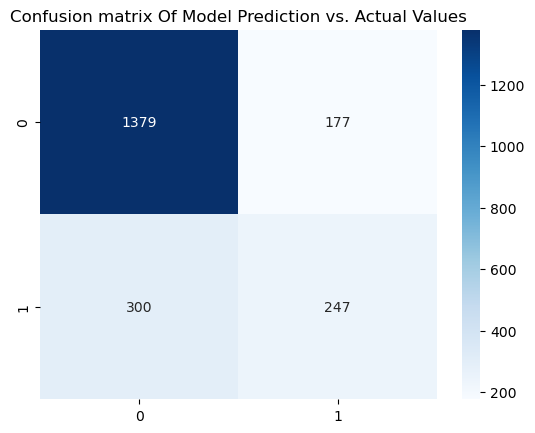

In [79]:
sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.title('Confusion matrix Of Model Prediction vs. Actual Values')

# PROBLEM STATEMENT - 2
#  Create a predictive model that can predict the mothly charges of a new customers based on the services and other details of the customer

In [81]:
df # data cleaning and preprocessing are completed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Feature Selection

In [82]:
# VIF

num_cols = [col for col in df.columns if df[col].dtype != 'object' and col!="MonthlyCharges"]
print(num_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [84]:
X = df[num_cols]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,306.60,1


In [85]:
VIF = pd.DataFrame()
VIF['Featues'] = X.columns
VIF['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]
VIF

,Featues,VIF
0,gender,1.938320
1,SeniorCitizen,1.354471
2,Partner,2.815635
3,Dependents,1.958963
4,tenure,14.030552
5,PhoneService,8.490359
6,MultipleLines,2.556895
7,InternetService,3.645533
8,OnlineSecurity,2.256243
9,OnlineBackup,2.454592


In [86]:
X = X.drop(['tenure'],axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = X.columns
VIF['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]
VIF

,Featues,VIF
0,gender,1.919848
1,SeniorCitizen,1.351898
2,Partner,2.751161
3,Dependents,1.957699
4,PhoneService,8.490327
5,MultipleLines,2.541494
6,InternetService,3.493346
7,OnlineSecurity,2.239134
8,OnlineBackup,2.442714
9,DeviceProtection,2.615166


In [87]:
X = X.drop(['PhoneService'],axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = X.columns
VIF['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]
VIF

,Featues,VIF
0,gender,1.870408
1,SeniorCitizen,1.349737
2,Partner,2.742090
3,Dependents,1.950450
4,MultipleLines,2.539303
5,InternetService,2.529301
6,OnlineSecurity,2.199623
7,OnlineBackup,2.437164
8,DeviceProtection,2.613855
9,TechSupport,2.361377


In [88]:
X = X.drop(['TotalCharges'],axis=1)
VIF = pd.DataFrame()
VIF['Featues'] = X.columns
VIF['VIF'] = [vif(X.values,i) for i in range(len(X.columns))]
VIF

,Featues,VIF
0,gender,1.869879
1,SeniorCitizen,1.336197
2,Partner,2.664276
3,Dependents,1.934997
4,MultipleLines,2.206114
5,InternetService,2.335311
6,OnlineSecurity,2.164445
7,OnlineBackup,2.279550
8,DeviceProtection,2.535656
9,TechSupport,2.353408


In [89]:
X # indep. features

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,1


In [90]:
Y = df['MonthlyCharges']
Y #dep. feature

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7010, dtype: float64

In [91]:
#splitting data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [92]:
X_train

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
4336,0,1,0,0,2,1,2,2,0,2,2,2,2,1,0,0
2865,0,0,1,1,2,1,2,2,2,0,2,2,2,0,0,0
2395,0,1,1,0,2,1,0,0,2,0,2,0,1,1,2,0
3531,0,0,0,0,0,2,1,1,1,1,1,1,1,0,1,0
5141,1,0,0,0,0,2,1,1,1,1,1,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,0,0,1,0,2,1,0,2,0,0,2,0,0,1,2,1
3276,0,0,0,0,0,1,0,0,0,0,0,2,0,1,2,1
1661,0,1,1,0,2,1,0,2,2,0,2,2,0,1,0,0
2617,0,0,0,0,0,2,1,1,1,1,1,1,0,1,3,1


In [93]:
Y_train

4336    110.10
2865    109.25
2395     90.70
3531     19.35
5141     19.25
         ...  
4950     91.65
3276     79.15
1661    108.80
2617     19.60
2743    111.05
Name: MonthlyCharges, Length: 4907, dtype: float64

In [94]:
X_test

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3719,1,0,0,0,0,2,1,1,1,1,1,1,1,0,1,0
2645,0,0,0,0,0,2,1,1,1,1,1,1,0,0,1,0
2945,1,0,0,0,0,1,2,0,0,0,0,0,0,0,2,0
2706,1,0,1,0,0,1,0,0,2,0,0,0,0,0,2,1
1902,1,0,1,1,2,0,2,2,2,2,2,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,1,0,1,1,0,0,2,0,0,0,2,2,0,0,1,0
298,1,0,1,1,2,0,0,0,2,0,2,2,0,1,2,0
6571,0,0,0,0,0,0,2,2,0,0,0,0,1,0,3,0
1304,1,1,1,0,2,1,0,0,0,0,0,2,0,1,0,1


In [95]:
Y_test

3719     18.25
2645     19.80
2945     75.60
2706     76.40
1902     90.60
         ...  
562      69.70
298      74.55
6571     55.00
1304     85.60
5197    110.15
Name: MonthlyCharges, Length: 2103, dtype: float64

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [98]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [99]:
Y_pred = linear_model.predict(X_test)
Y_pred

array([34.38178075, 39.49055695, 29.18440361, ..., 39.01490241,
       91.89564832, 87.17225075])

In [100]:
r2_score(Y_test, Y_pred)

#here we get only 50% accuracy

0.5017232346699985

In [102]:
mse = mean_squared_error(Y_test, Y_pred)
mse

447.3813842155626

In [103]:
import numpy as np 
rmse = np.sqrt(mse)
rmse

21.151392016024918

In [104]:
# Without performing VIF 

In [105]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col!="MonthlyCharges"]
print(num_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [106]:
X = df[num_cols]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,306.60,1


In [107]:
Y = df['MonthlyCharges']
Y #dep. feature

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7010, dtype: float64

In [108]:
#splitting data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

In [109]:
linear_model2 = LinearRegression()
linear_model2

LinearRegression()

In [110]:
linear_model2.fit(X_train,Y_train)

LinearRegression()

In [111]:
Y_pred = linear_model2.predict(X_test)
Y_pred

array([ 27.71862219,  42.10338615,  47.23277824, ...,  51.0364739 ,
        85.9579764 , 117.15651021])

In [113]:
r2_score(Y_test, Y_pred)

#here we get 80% accuracy

0.8040442307742636

In [114]:
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mse,rmse

(175.9402994100573, 13.26424891993728)